# Sentiment Analysis on Business(Customer Review)

In [398]:
#import all the necessary packages

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import style
style.use('ggplot')

### Load Data

In [399]:
import pandas as pd
df=pd.read_csv(r'C:\Users\91828\Desktop\NLP-review\Customer.csv')
df.head(2)


,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman


In [400]:
df=df[['reviews.text','reviews.rating']]
df

,reviews.text,reviews.rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
34655,This is not appreciably faster than any other ...,3.0
34656,Amazon should include this charger with the Ki...,1.0
34657,Love my Kindle Fire but I am really disappoint...,1.0
34658,I was surprised to find it did not come with a...,1.0


In [401]:
df = df.rename(columns={'reviews.text': 'reviews', 'reviews.rating': 'rating'})
df

,reviews,rating
0,This product so far has not disappointed. My c...,5.0
1,great for beginner or experienced person. Boug...,5.0
2,Inexpensive tablet for him to use and learn on...,5.0
3,I've had my Fire HD 8 two weeks now and I love...,4.0
4,I bought this for my grand daughter when she c...,5.0
...,...,...
34655,This is not appreciably faster than any other ...,3.0
34656,Amazon should include this charger with the Ki...,1.0
34657,Love my Kindle Fire but I am really disappoint...,1.0
34658,I was surprised to find it did not come with a...,1.0


In [402]:
# check the null values
df.isnull().sum()

reviews     1
rating     33
dtype: int64

We only have null values in condition. We will drop the records with null values as it only accounts for 0.5 % of total data.

In [403]:
# drop the null values
df.dropna(inplace=True, axis=0)

In [404]:

# # Convert Score to sentiment label
# def label_sentiment(score):
#     if score >3:
#         return "Positive"
#     elif score == 3:
#         return "Neutral"
#     else:
#         return "Negative"

# df['Sentiment'] = df['rating'].apply(label_sentiment)


In [405]:
# # target column 
# df[['rating', 'Sentiment']].sample(5)

In [406]:
df['rating'] = df['rating'].astype(int)
df


,reviews,rating
0,This product so far has not disappointed. My c...,5
1,great for beginner or experienced person. Boug...,5
2,Inexpensive tablet for him to use and learn on...,5
3,I've had my Fire HD 8 two weeks now and I love...,4
4,I bought this for my grand daughter when she c...,5
...,...,...
34655,This is not appreciably faster than any other ...,3
34656,Amazon should include this charger with the Ki...,1
34657,Love my Kindle Fire but I am really disappoint...,1
34658,I was surprised to find it did not come with a...,1


In [407]:
# Display the DataFrame
print(df.head())

                                             reviews  rating
0  This product so far has not disappointed. My c...       5
1  great for beginner or experienced person. Boug...       5
2  Inexpensive tablet for him to use and learn on...       5
3  I've had my Fire HD 8 two weeks now and I love...       4
4  I bought this for my grand daughter when she c...       5


In [408]:
# neutral_reviews = df[df['Sentiment'] == 'Neutral']

# # Count the occurrences of each value in the DataFrame
# value_counts = neutral_reviews['Sentiment'].value_counts()

# print(value_counts)


In [409]:
# positive_reviews = df[df['Sentiment'] == 'Positive']

# # Count the occurrences of each value in the DataFrame
# value_counts = positive_reviews['Sentiment'].value_counts()

# print(value_counts)


In [410]:
# neg_reviews = df[df['Sentiment'] == 'Negative']

# # Count the occurrences of each value in the DataFrame
# value_counts = neg_reviews['Sentiment'].value_counts()

# print(value_counts)


In [411]:
rating1 = df[df['rating'] == 1]

# Count the occurrences of each value in the DataFrame
value_counts = rating1['rating'].value_counts()

print(value_counts)

rating
1    410
Name: count, dtype: int64


In [412]:
rating2 = df[df['rating'] == 2]

# Count the occurrences of each value in the DataFrame
value_counts = rating2['rating'].value_counts()

print(value_counts)

rating
2    402
Name: count, dtype: int64


In [413]:
rating3 = df[df['rating'] == 3]

# Count the occurrences of each value in the DataFrame
value_counts = rating3['rating'].value_counts()

print(value_counts)

rating
3    1499
Name: count, dtype: int64


In [414]:
rating4 = df[df['rating'] == 4]

# Count the occurrences of each value in the DataFrame
value_counts = rating4['rating'].value_counts()

print(value_counts)

rating
4    8541
Name: count, dtype: int64


In [415]:
rating5 = df[df['rating'] == 5]

# Count the occurrences of each value in the DataFrame
value_counts = rating5['rating'].value_counts()

print(value_counts)

rating
5    23774
Name: count, dtype: int64


In [416]:
# fig, ax = plt.subplots(figsize=(16, 6))

# vc = df.Sentiment.value_counts()
# vc.plot.barh(color="blue",fontsize=14,ax=ax)
# ax.set_title("Label vs Count", fontsize=15)
# plt.show()

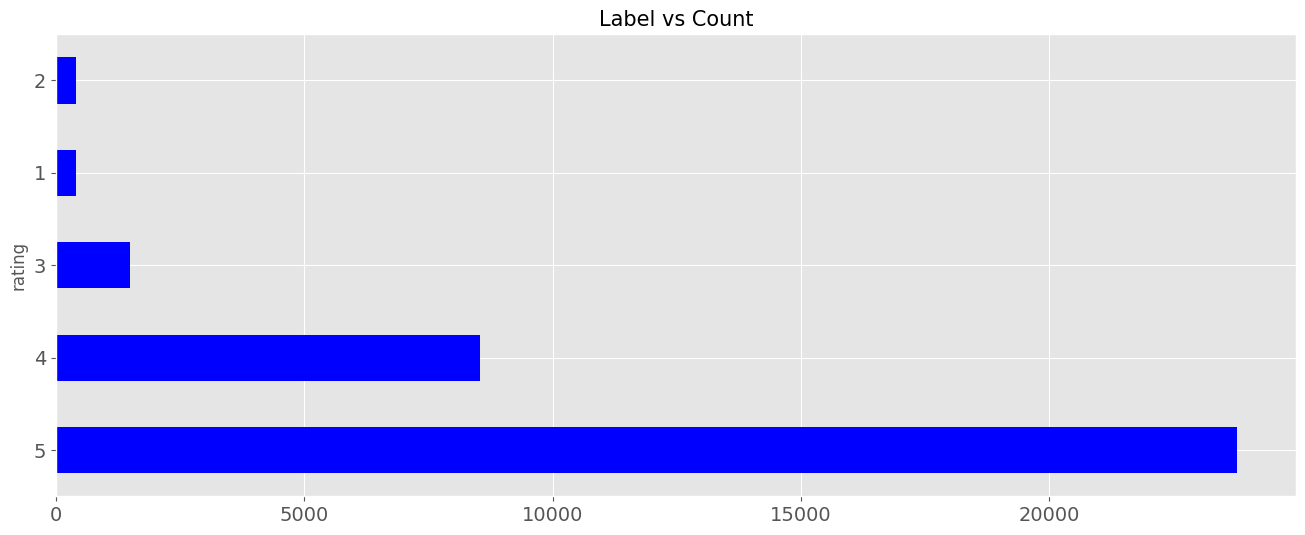

In [417]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = df.rating.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [418]:
import pandas as pd

# Find the minimum count among all sentiment categories
min_count = min(len(rating1), len(rating2), len(rating3), len(rating4), len(rating5))

# Downsample the positive sentiment data
ratings5 = rating5.sample(n=min_count, random_state=42)

# Upsample the neutral and negative sentiment daata


ratings1 = rating1.sample(n=min_count, replace=True, random_state=42)
ratings2 = rating2.sample(n=min_count, replace=True, random_state=42)
ratings3 = rating3.sample(n=min_count, replace=True, random_state=42)
ratings4 = rating4.sample(n=min_count, replace=True, random_state=42)

# Concatenate the balanced data
balanced_data = pd.concat([ratings1, ratings2, ratings3, ratings4, ratings5])

# Shuffle the balanced data
df = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


# Now you have a balanced data containing equal counts of each sentiment category


In [419]:
df['rating'].value_counts()

rating
3    402
2    402
1    402
4    402
5    402
Name: count, dtype: int64

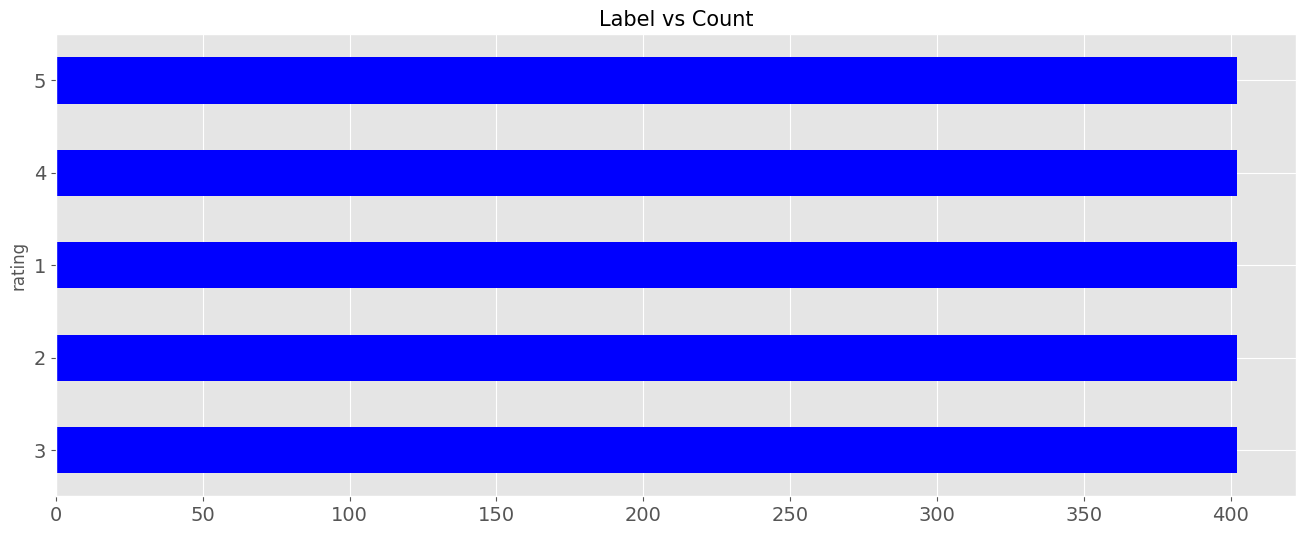

In [420]:
fig, ax = plt.subplots(figsize=(16, 6))

vc = df.rating.value_counts()
vc.plot.barh(color="blue",fontsize=14,ax=ax)
ax.set_title("Label vs Count", fontsize=15)
plt.show()

In [421]:
# import pandas as pd
# # Extract separate DataFrames for each sentiment category
# neutral_data = df[df['Sentiment'] == 'Neutral']
# positive_data = df[df['Sentiment'] == 'Positive']
# negative_data = df[df['Sentiment'] == 'Negative']

# # Find the minimum count among all sentiment categories
# min_count = min(len(neutral_data), len(positive_data), len(negative_data))

# # Downsample the positive sentiment data
# positive_sampled = positive_data.sample(n=min_count, random_state=42)

# # Upsample the neutral and negative sentiment daata
# neutral_sampled = neutral_data.sample(n=min_count, replace=True, random_state=42)
# negative_sampled = negative_data.sample(n=min_count, replace=True, random_state=42)

# # Concatenate the balanced data
# balanced_data = pd.concat([positive_sampled, neutral_sampled, negative_sampled])

# # Shuffle the balanced data
# df= balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)


# # Now you have a balanced data containing equal counts of each sentiment category


In [422]:
# df['Sentiment'].value_counts()

In [423]:
# fig, ax = plt.subplots(figsize=(16, 6))

# vc = df.Sentiment.value_counts()
# vc.plot.barh(color="blue",fontsize=14,ax=ax)
# ax.set_title("Label vs Count", fontsize=15)
# plt.show()

In [424]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

import string
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings('ignore')

import pickle

In [425]:
import nltk
nltk.download('stopwords')


# stopwords
total_stopwords = set(stopwords.words('english'))

# subtract negative stop words like no, not, don't etc.. from total_stopwords
negative_stop_words = set(word for word in total_stopwords 
                          if "n't" in word or 'no' in word)

final_stopwords = total_stopwords - negative_stop_words

# 
final_stopwords.add("one")
print(final_stopwords)

{'most', 'will', 'just', 'up', 'my', 'should', "that'll", 'won', 'himself', 'but', 'with', 'they', 'how', 'doing', 'because', 'mustn', 'm', 'am', 'why', 'an', "she's", 'themselves', 'very', "you've", 'you', 'again', 'needn', 'had', 'who', 'for', 'd', 'didn', 'than', 'she', 'there', 'hers', 'shan', 'this', 'through', 'other', "should've", 'is', 'such', 'yourself', 'here', 'too', 'further', 'are', 'haven', 'if', 's', 'ours', 'while', 'after', 'those', 'mightn', 'between', 'her', 'same', 'did', 'couldn', 'their', 'been', "it's", 'it', 'isn', 'at', 'does', 'own', 'so', 'some', 'aren', 'off', 'when', 'wasn', 'by', 'until', 'his', 'which', 'as', 'the', 'wouldn', 'what', 'were', 'these', 'in', 'where', 'theirs', 'more', 'of', 'both', 't', 'shouldn', 'out', 'me', 'he', 'y', 'itself', 'don', 'them', 'each', 'and', 'ma', 'yours', 'one', 'whom', 'herself', 'its', 'having', 'ourselves', 'll', 'above', 've', 'ain', 'be', 'that', 'about', 'against', 'only', 'do', "you're", 'hasn', 'to', 'myself', 'b

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91828\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [426]:
#stemming object
stemmer = PorterStemmer()

# ---------------------------------------------
HTMLTAGS = re.compile('<.*?>')
table = str.maketrans(dict.fromkeys(string.punctuation))
remove_digits = str.maketrans('', '', string.digits)
MULTIPLE_WHITESPACE = re.compile(r"\s+")
# ---------------------------------------------

In [427]:
def preprocessor(reviews):
    # remove html tags
    reviews = HTMLTAGS.sub(r'', reviews)

    # remove puncutuation
    reviews = reviews.translate(table)
    
    # remove digits
    reviews = reviews.translate(remove_digits)
    
    # lower case all letters
    reviews = reviews.lower()
    
    # replace multiple white spaces with single space
    reviews = MULTIPLE_WHITESPACE.sub(" ", reviews).strip()
    
    # remove stop words
    reviews = [word for word in reviews.split()
              if word not in final_stopwords]
    
    # stemming
    reviews = ' '.join([stemmer.stem(word) for word in reviews])
    
    return reviews

In [428]:
print("Before preprocessing : ")
df.reviews.iloc[6]

Before preprocessing : 


'i am still learning all its features great alarm, music, spelling and somewhat internet helpful i am very satisfied with this ourchase'

In [429]:
# apply preprocessing function

df.reviews = df.reviews.apply(preprocessor) 
print("After preprocessing : ")
df.reviews.iloc[6]

After preprocessing : 


'still learn featur great alarm music spell somewhat internet help satisfi ourchas'

In [430]:
def generate_wcloud(reviews):
    stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(stopwords=stopwords, background_color='white')
    wordcloud.generate(reviews)
    
    plt.figure(figsize=(15,7))
    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    return plt.show()

In [431]:
# pos = df.loc[df.Sentiment=="Positive"].reviews
# text = " ".join(reviews for reviews in pos.astype(str))

# generate_wcloud(text)

In [432]:
# pos = df.loc[df.Sentiment=="Negative"].reviews
# text = " ".join(reviews for reviews in pos.astype(str))

# generate_wcloud(text)

In [433]:
# pos = df.loc[df.Sentiment=="Neutral"].reviews
# text = " ".join(reviews for reviews in pos.astype(str))

# generate_wcloud(text)

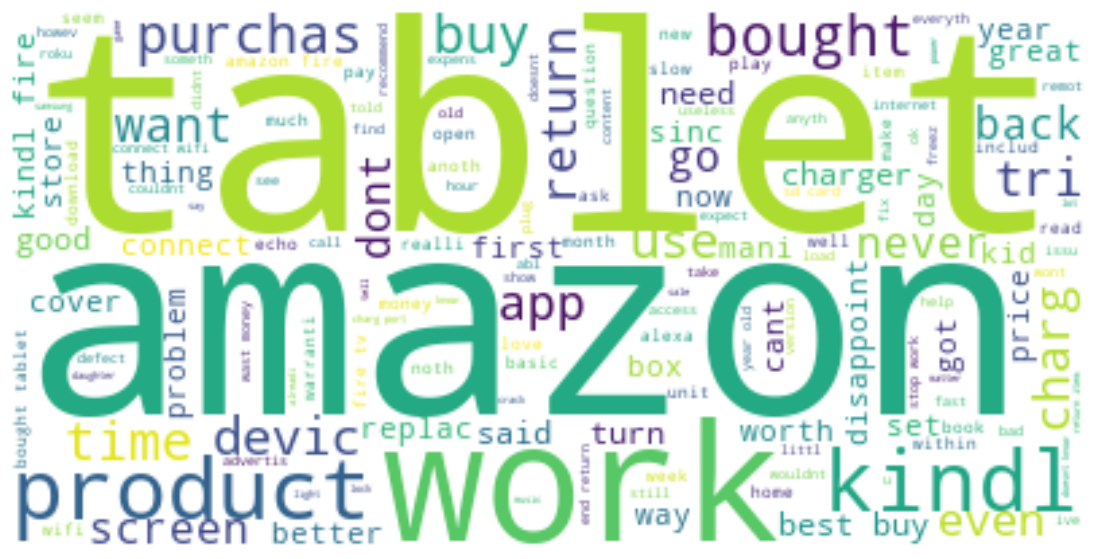

In [434]:
pos = df.loc[df.rating==1].reviews
text = " ".join(reviews for reviews in pos.astype(str))

generate_wcloud(text)

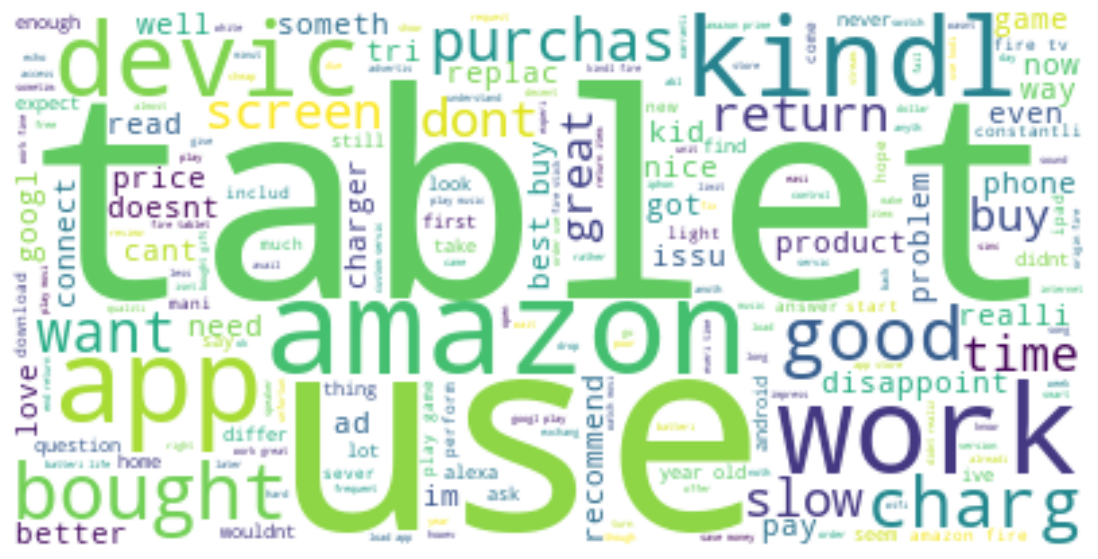

In [435]:
pos = df.loc[df.rating==2].reviews
text = " ".join(reviews for reviews in pos.astype(str))

generate_wcloud(text)

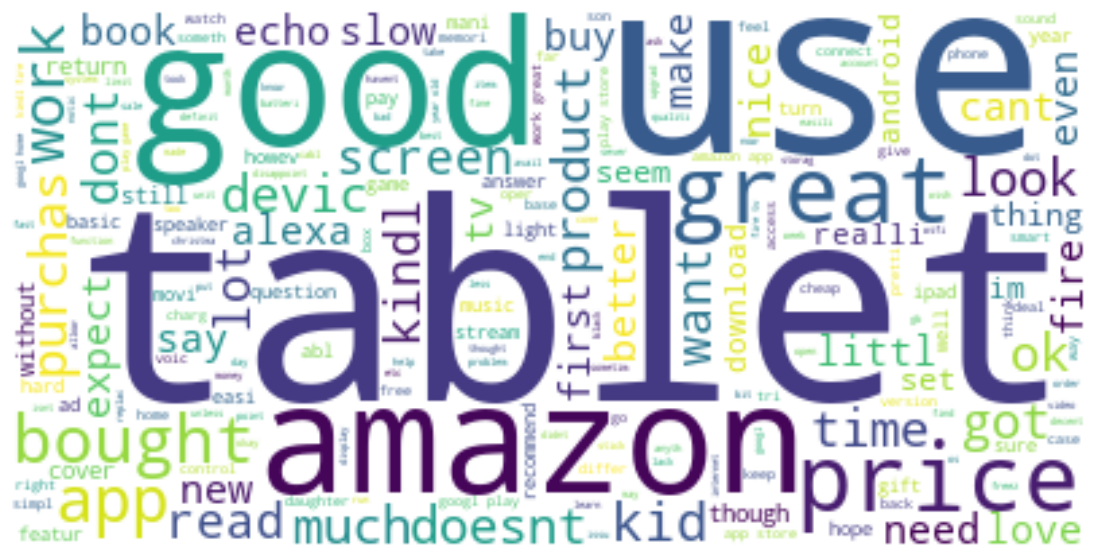

In [436]:
pos = df.loc[df.rating==3].reviews
text = " ".join(reviews for reviews in pos.astype(str))

generate_wcloud(text)

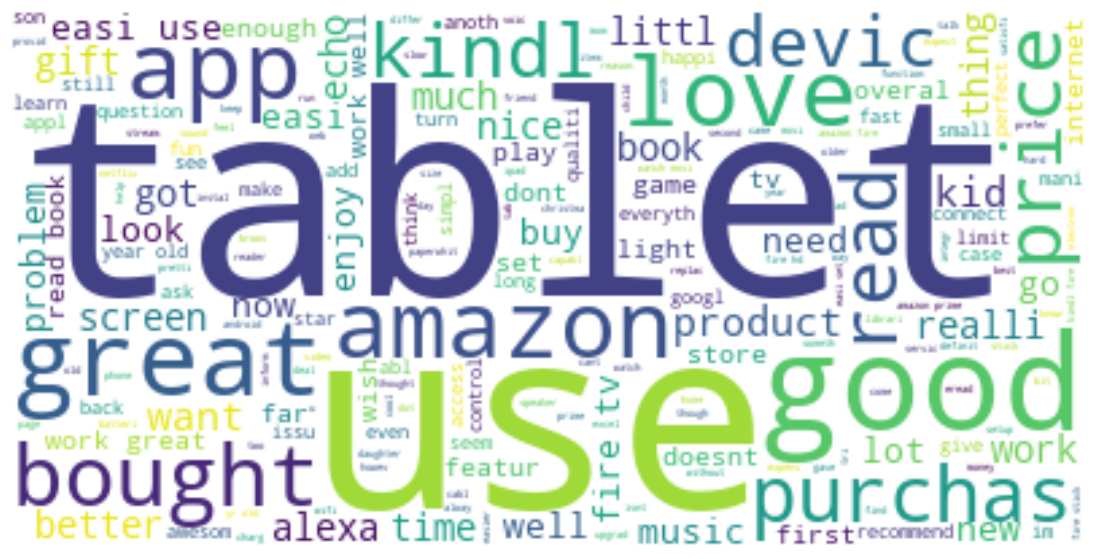

In [437]:
pos = df.loc[df.rating==4].reviews
text = " ".join(reviews for reviews in pos.astype(str))

generate_wcloud(text)

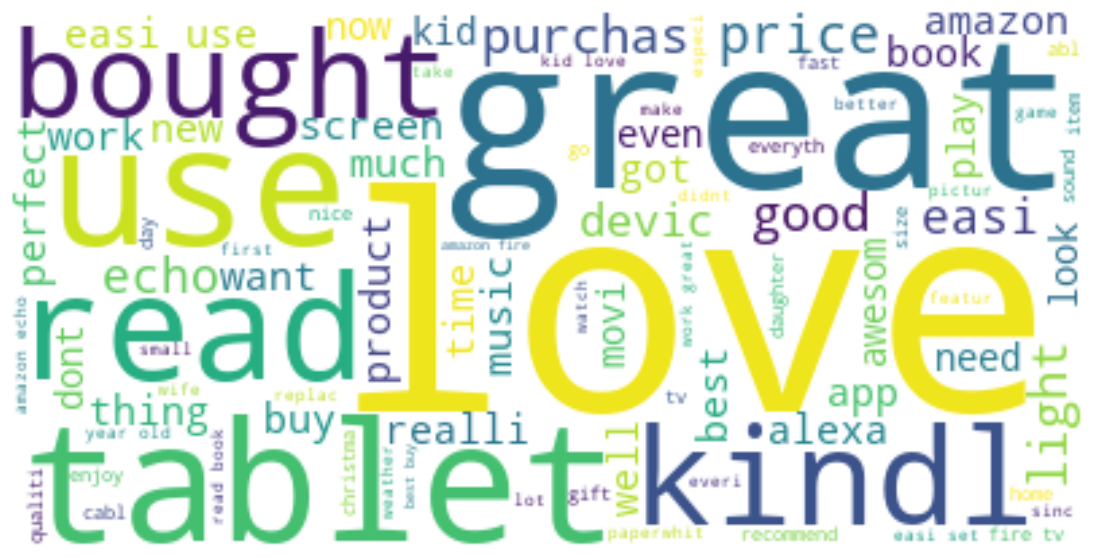

In [438]:
pos = df.loc[df.rating==5].reviews
text = " ".join(reviews for reviews in pos.astype(str))

generate_wcloud(text)

### Steps for reviews pre-processing.
* **Remove HTML tags**
     * Using BeautifulSoup from bs4 module to remove the html tags. We have already removed the html tags with pattern "64</_span_>...", we will use get_text() to remove the html tags if there are any.
* **Remove Stop Words**
     * Remove the stopwords like "a", "the", "I" etc.
* **Remove symbols and special characters**
     * We will remove the special characters from our reviews like '#' ,'&' ,'@' etc.
* **Tokenize**
     * We will tokenize the words. We will split the sentences with spaces e.g "I might come" --> "I", "might", "come"
* **Stemming**
     * Remove the suffixes from the words to get the root form of the word e.g 'Wording' --> "Word"

## Building Model

In [439]:
#import all the necessary packages

from sklearn.model_selection import train_test_split #import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer #import TfidfVectorizer 
from sklearn.metrics import confusion_matrix #import confusion_matrix
from sklearn.naive_bayes import MultinomialNB #import MultinomialNB
from sklearn.ensemble import RandomForestClassifier  #import RandomForestClassifier

 we cannot pass raw text features in our model. We have to convert them into numeric values. We will use TfidfVectorizer to convert our reviews in numeric features.

### TfidfVectorizer (Term frequency - Inverse document frequency)
**TF - Term Frequency** :- 

How often a term t occurs in a document d.

TF = (_Number of occurences of a word in document_) / (_Number of words in that document_)

**Inverse  Document Frequency**

IDF = log(Number of sentences / Number of sentence containing word)

**Tf - Idf = Tf * Idf**


In [440]:
X = df.reviews
y = df.rating

X_train, X_test, y_train, y_test = train_test_split(
    
    X, y, test_size=0.20, random_state=1, stratify=y)

In [441]:
X_train.shape, X_test.shape

((1608,), (402,))

In [442]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=10000)
bow_vectorizer.fit(X_train)

# transform
bow_X_train = bow_vectorizer.transform(X_train)
bow_X_test = bow_vectorizer.transform(X_test)

In [443]:
tfidf_vectorizer = TfidfVectorizer(max_features=10000)
tfidf_vectorizer.fit(X_train)

# transform
tfidf_X_train = tfidf_vectorizer.transform(X_train)
tfidf_X_test = tfidf_vectorizer.transform(X_test)

In [444]:
# labelEncoder = LabelEncoder()

# y_train = labelEncoder.fit_transform(y_train)
# y_test = labelEncoder.transform(y_test)

# labels = labelEncoder.classes_.tolist()
# print(labels) # index-> class

In [445]:
### 
from sklearn.metrics import accuracy_score, confusion_matrix
def train_and_eval(model, trainX, trainY, testX, testY):

    # training
    _ = model.fit(trainX, trainY)

    # predictions
    y_preds_train = model.predict(trainX)
    y_preds_test = model.predict(testX)

    # evaluation
    print()
    print(model)
    print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
    print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")
    print('\n',40*'-')

In [446]:
# Hyperparameters
from sklearn.linear_model import LogisticRegression
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.5105721393034826
Test accuracy score : 0.4577114427860697

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.6268656716417911
Test accuracy score : 0.4626865671641791

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.8140547263681592
Test accuracy score : 0.5522388059701493

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.9670398009950248
Test accuracy score : 0.5920398009950248

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.9975124378109452
Test accuracy score : 0.5920398009950248

 ----------------------------------------


In [447]:
from sklearn.naive_bayes import MultinomialNB
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=bow_X_train,
                   trainY=y_train,
                   testX=bow_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.878731343283582
Test accuracy score : 0.4925373134328358

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.8420398009950248
Test accuracy score : 0.5422885572139303

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.8159203980099502
Test accuracy score : 0.5348258706467661

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.8059701492537313
Test accuracy score : 0.5373134328358209

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.7941542288557214
Test accuracy score : 0.5248756218905473

 ----------------------------------------


In [448]:
# Hyperparameters
C = [0.001, 0.01, 0.1, 1, 10]

for c in C: 
    # Define model
    log_model = LogisticRegression(C=c, max_iter=500, random_state=1)
    
    # Train and evaluate model
    train_and_eval(model=log_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


LogisticRegression(C=0.001, max_iter=500, random_state=1)
Train accuracy score : 0.5740049751243781
Test accuracy score : 0.4502487562189055

 ----------------------------------------

LogisticRegression(C=0.01, max_iter=500, random_state=1)
Train accuracy score : 0.7014925373134329
Test accuracy score : 0.5323383084577115

 ----------------------------------------

LogisticRegression(C=0.1, max_iter=500, random_state=1)
Train accuracy score : 0.7350746268656716
Test accuracy score : 0.5472636815920398

 ----------------------------------------

LogisticRegression(C=1, max_iter=500, random_state=1)
Train accuracy score : 0.871268656716418
Test accuracy score : 0.5895522388059702

 ----------------------------------------

LogisticRegression(C=10, max_iter=500, random_state=1)
Train accuracy score : 0.9881840796019901
Test accuracy score : 0.5970149253731343

 ----------------------------------------


In [449]:
alphas = [0, 0.2, 0.6, 0.8, 1]

for a  in alphas: 
    # Define model
    nb_model = MultinomialNB(alpha=a)

    # Train and evaluate model
    train_and_eval(model=nb_model,
                   trainX=tfidf_X_train,
                   trainY=y_train,
                   testX=tfidf_X_test,
                   testY=y_test)


MultinomialNB(alpha=0)
Train accuracy score : 0.9266169154228856
Test accuracy score : 0.49502487562189057

 ----------------------------------------

MultinomialNB(alpha=0.2)
Train accuracy score : 0.8905472636815921
Test accuracy score : 0.5472636815920398

 ----------------------------------------

MultinomialNB(alpha=0.6)
Train accuracy score : 0.8569651741293532
Test accuracy score : 0.5522388059701493

 ----------------------------------------

MultinomialNB(alpha=0.8)
Train accuracy score : 0.8370646766169154
Test accuracy score : 0.5572139303482587

 ----------------------------------------

MultinomialNB(alpha=1)
Train accuracy score : 0.8264925373134329
Test accuracy score : 0.5522388059701493

 ----------------------------------------


In [450]:
def plot_cm(y_true, y_pred, labels):
    plt.figure(figsize=(6,6))
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')
    
    sns.heatmap(
        cm, annot=True, cmap='Blues', cbar=False, fmt='.2f',
        xticklabels=labels, yticklabels=labels)
    
    plt.show()

In [451]:
bmodel = LogisticRegression(C=0.1)
bmodel.fit(bow_X_train, y_train)

LogisticRegression(C=0.1)

In [452]:
# predictions
y_preds_train = bmodel.predict(bow_X_train)
y_preds_test = bmodel.predict(bow_X_test)

In [453]:
print(f"Train accuracy score : {accuracy_score(y_train, y_preds_train)}")
print(f"Test accuracy score : {accuracy_score(y_test, y_preds_test)}")

Train accuracy score : 0.8140547263681592
Test accuracy score : 0.5522388059701493


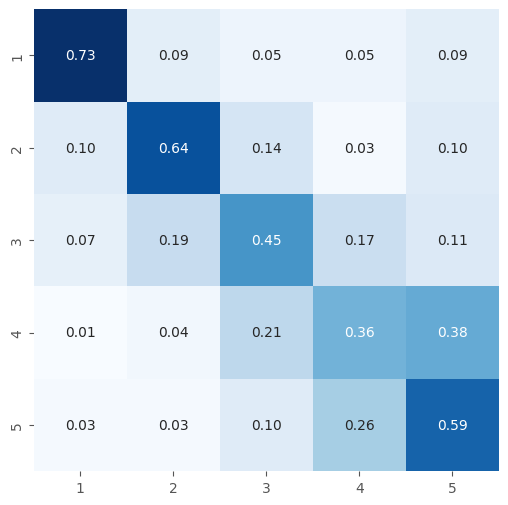

In [454]:
plot_cm(y_test, y_preds_test, labels=[1, 2, 3, 4, 5])

In [455]:
import pickle
with open("transformer1.pkl", "wb") as f:
    pickle.dump(bow_vectorizer, f)
    
with open("model1.pkl", "wb") as f:
    pickle.dump(bmodel, f)

In [456]:

def get_rating(review):
    # preprocessing
    x = preprocessor(review)
    #vectorization
    x = bow_vectorizer.transform([x])
    #prediction
    y = int(bmodel.predict(x.reshape(1,-1)))
    return (y)

In [457]:
# rating =5
review = "Absolutely love this project! It exceeded my expectations and helped me so much."
print(f"This is a {get_rating(review)} review!")

This is a 5 review!


In [458]:
review = "I am satisfied with this project."
print(f"This is a {get_rating(review)} review!")

This is a 4 review!


In [459]:
review = "This project did meet all the conditions I have given."
print(f"This is a {get_rating(review)} review!")

This is a 3 review!


In [460]:
review = "This code contains full errors"
print(f"This is a {get_rating(review)} review!")

This is a 2 review!


In [461]:
review = "This project is the worst. No requirements are met"
print(f"This is a {get_rating(review)} review!")

This is a 1 review!
